loss: 706.90576171875
loss: 0.31764668226242065
loss: 0.24081824719905853
loss: 0.1864226907491684
loss: 0.14206603169441223
loss: 0.104509636759758
loss: 0.07410485297441483
loss: 0.050990354269742966
loss: 0.03454001992940903
loss: 0.023527249693870544
loss: 0.01647952012717724
loss: 0.012103909626603127
loss: 0.00940170418471098
loss: 0.007722283713519573
loss: 0.006604844704270363
loss: 0.005808068905025721
loss: 0.005165425129234791
loss: 0.004630646668374538
loss: 0.004130654502660036
loss: 0.003612112021073699
loss: 0.0031048119999468327
loss: 0.0027178539894521236
loss: 0.0024310697335749865
loss: 0.002185183111578226
loss: 0.00198274664580822
loss: 0.001797753619030118
loss: 0.001621306873857975
loss: 0.001451970310881734
loss: 0.0013065087841823697
loss: 0.001187036163173616
loss: 0.0010910149430856109
loss: 0.0010113735916092992
loss: 0.0009433379746042192
loss: 0.0008849440491758287
loss: 0.0008345067617483437
loss: 0.0007906433893367648
loss: 0.0007520120707340539
loss: 0.

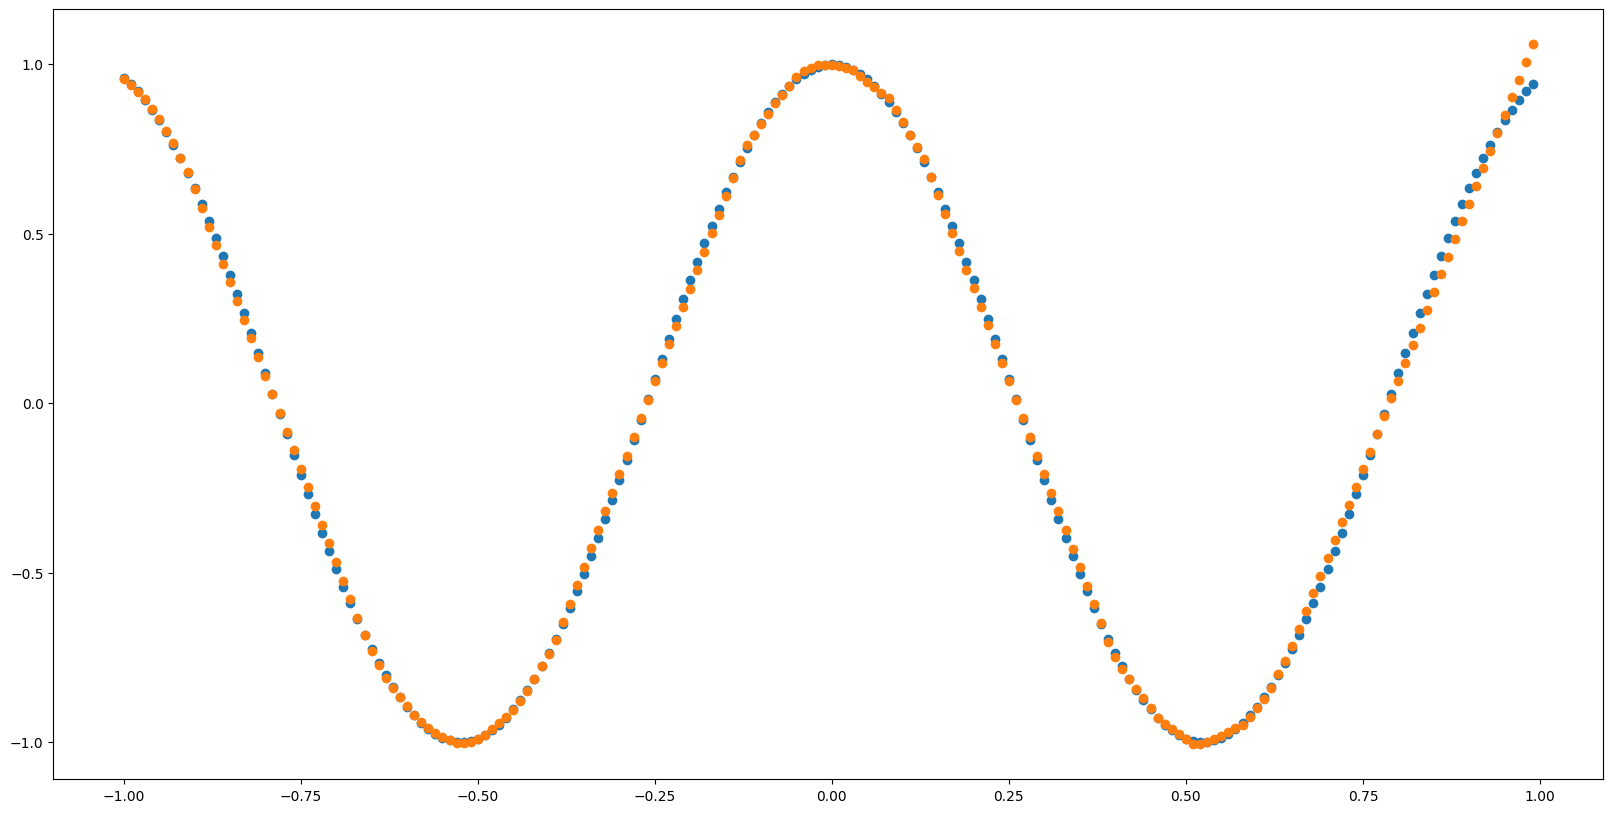

In [14]:
import torch


# define input x whose value is in between -2 and 2
x = torch.arange(-1,1,0.01,dtype=torch.float32).reshape(-1,1)
# torch.rand([500,1])
#x = torch.rand([100,1])

# learning rate 
lr = 0.01

# linear y = 3*x + 2
y_true = torch.cos(12*x)

#print(y_true)
layer_dim = 100

# define weight
w = torch.rand([1,layer_dim], requires_grad=True)
b = torch.rand([layer_dim], requires_grad=True)
#print(x*w + b)
w_2 = torch.rand([layer_dim,1], requires_grad=True)

for i in range(30000):
    y_relu = torch.nn.functional.relu(x*w + b)
    y_pred = torch.mm(y_relu, w_2)

    #y_pred = y_relu.sum(dim=1)
    # print(f"y size is: {y_pred.size()}")
    # define loss
    loss = torch.mean((y_true - y_pred)**2)

    # backward 
    loss.backward()
    w.data = w.data - lr*w.grad
    b.data = b.data - lr*b.grad
    w_2.data = w_2.data - lr*w_2.grad

    # clear grad
    w.grad = None
    b.grad = None
    w_2.grad = None

    if i % 500 == 0:
        #print(f"w: {w}, b: {b}, loss: {loss}")
        print(f"loss: {loss}")

# 用plotlib画出y_pred和y_true的关系
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plt.scatter(x.numpy().reshape(-1),y_true.numpy().reshape(-1))
plt.scatter(x.numpy().reshape(-1),y_pred.detach().numpy().reshape(-1))
plt.show()